In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
#data genereation

In [17]:
observations = 1000

In [18]:
xs = np.random.uniform(low=10,high=10,size=(observations,1))

In [19]:
zs = np.random.uniform(low=10,high=10,size=(observations,1))

In [20]:
generated_inputs = np.column_stack((xs,zs))

In [21]:
noise = np.random.uniform(-1,1,(observations,1))

In [22]:
generated_targets = 2* xs - 3 *zs + 5 + noise

In [23]:
np.savez('TF_intro',inputs=generated_inputs, targets = generated_targets)

In [24]:
#tensor

In [25]:
input_size = 2
output_size = 1

In [26]:
inputs = tf.placeholder(tf.float32,[None,input_size])
targets = tf.placeholder(tf.float32,[None,output_size])

In [29]:
weights = tf.Variable(tf.random_uniform([input_size,output_size],minval= 0.1, maxval = 0.1))
biases = tf.Variable(tf.random_uniform([output_size],minval = 0.1, maxval = 0.1))

In [30]:
outputs = tf.matmul(inputs,weights) + biases

In [31]:
#loss

In [34]:
mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs) / 2.

optimize = tf.train. GradientDescentOptimizer(learning_rate= 0.5).minimize(mean_loss)


In [35]:
#execution

In [36]:
sess = tf.InteractiveSession()

In [37]:
initialize = tf.global_variables_initializer()

sess.run(initialize)

In [39]:
training_data = np.load('TF_intro.npz')

In [40]:
#learning

In [41]:
for e in range(100):
    _,curr_loss = sess.run([optimize,mean_loss],feed_dict={inputs:training_data['inputs'],targets:training_data['targets']})
    
    print(curr_loss)

25.154572
247423.9
2449556500.0
24251185000000.0
2.4009369e+17
2.376973e+21
2.353272e+25
2.3297937e+29
2.3065585e+33
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


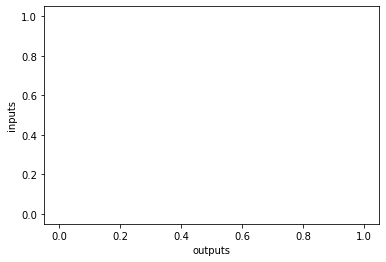

In [43]:
data_out = sess.run([outputs],feed_dict={inputs:training_data['inputs']})

plt.plot(np.squeeze(data_out),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('inputs')
plt.show()